In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import (
    HistGradientBoostingClassifier,  # Histogram-Based Gradient Boosting Classifier
    GradientBoostingClassifier,  # Gradient Boosting Classifier
    AdaBoostClassifier,  # AdaBoost Classifier
    RandomForestClassifier,  # Random Forest Classifier
    ExtraTreesClassifier,  # Extra Trees Classifier
    VotingClassifier,  # Ensemble Voting Classifier
    StackingClassifier,  
)
from xgboost import XGBClassifier  # XGBoost Classifier
from lightgbm import LGBMClassifier # lightgbm Classifier

# Import evaluation metrics
from sklearn.metrics import f1_score
import pandas as pd

C:\Users\indra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")
origin = pd.read_csv("../dataset/horse.csv")
train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [6]:
origin.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [7]:
num_var = [column for column in train.columns if train[column].nunique() > 2]

# Create a list 'bin_var' that contains column names from 'train' where the number of unique values is exactly 2 (binary variables)
bin_var = [column for column in train.columns if train[column].nunique() == 2]

# Create a list 'cat_var' that contains specific categorical column names from 'train'
cat_var = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
          'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
          'abdomen', 'abdomo_appearance', 'lesion_2', 'surgery', 'age', 'surgical_lesion', 'lesion_3', 'cp_data']

# Define the target variable, which is 'outcome'
target = 'outcome'

In [8]:
# train["is_generated"] = 1

# # Add a new column 'is_generated' to the 'test' DataFrame and set all values to 1
# test["is_generated"] = 1

# # Add a new column 'is_generated' to the 'origin' DataFrame and set all values to 0
# origin["is_generated"] = 0

# Drop the 'id' column from the 'train' DataFrame
train.drop('id', axis=1, inplace=True)

# Drop the 'id' column from the 'test' DataFrame
test.drop('id', axis=1, inplace=True)

# Concatenate the 'train' and 'origin' DataFrames along rows, ignoring index, and store the result in 'train_total'
train_total = pd.concat([train, origin], ignore_index=True)

# Remove duplicate rows from the 'train_total' DataFrame, if any
train_total.drop_duplicates(inplace=True)
total = pd.concat([train_total, test], ignore_index=True)

print('The shape of the train data:', train.shape)
print('The shape of the test data:', test.shape)
print('The shape of the total data:', total.shape)

The shape of the train data: (1235, 28)
The shape of the test data: (824, 27)
The shape of the total data: (2355, 28)


In [9]:
def chi_squared_test(df, input_var, target_var, significance_level=0.05):
    contingency_table = pd.crosstab(df[input_var], df[target_var])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    
    if p < significance_level:
        print(f'\033[32m{input_var} has a significant relationship with the target variable.\033[0m') 
    else:
        print(f'\033[31m{input_var} does not have a significant relationship with the target variable.\033[0m')  

for i in cat_var:
    chi_squared_test(train, i, target)

temp_of_extremities has a significant relationship with the target variable.
peripheral_pulse has a significant relationship with the target variable.
mucous_membrane has a significant relationship with the target variable.
capillary_refill_time has a significant relationship with the target variable.
pain has a significant relationship with the target variable.
peristalsis has a significant relationship with the target variable.
abdominal_distention has a significant relationship with the target variable.
nasogastric_tube has a significant relationship with the target variable.
nasogastric_reflux has a significant relationship with the target variable.
rectal_exam_feces has a significant relationship with the target variable.
abdomen has a significant relationship with the target variable.
abdomo_appearance has a significant relationship with the target variable.
lesion_2 has a significant relationship with the target variable.
surgery has a significant relationship with the target va

In [10]:
total[target] = total[target].map({'died':0,'euthanized':1,'lived':2})

In [11]:
def preprocessing(df, le_cols, ohe_cols):
    
    le = LabelEncoder()    
    for col in le_cols:
        df[col] = le.fit_transform(df[col])
    
    df = pd.get_dummies(df, columns = ohe_cols)
    
    df["pain"] = df["pain"].replace('slight', 'moderate')
    df["peristalsis"] = df["peristalsis"].replace('distend_small', 'normal')
    df["rectal_exam_feces"] = df["rectal_exam_feces"].replace('serosanguious', 'absent')
    df["nasogastric_reflux"] = df["nasogastric_reflux"].replace('slight', 'none')
        
    df["temp_of_extremities"] = df["temp_of_extremities"].fillna("normal").map({'cold': 0, 'cool': 1, 'normal': 2, 'warm': 3})
    df["peripheral_pulse"] = df["peripheral_pulse"].fillna("normal").map({'absent': 0, 'reduced': 1, 'normal': 2, 'increased': 3})
    df["capillary_refill_time"] = df["capillary_refill_time"].fillna("3").map({'less_3_sec': 0, '3': 1, 'more_3_sec': 2})
    df["pain"] = df["pain"].fillna("depressed").map({'alert': 0, 'depressed': 1, 'moderate': 2, 'mild_pain': 3, 'severe_pain': 4, 'extreme_pain': 5})
    df["peristalsis"] = df["peristalsis"].fillna("hypomotile").map({'hypermotile': 0, 'normal': 1, 'hypomotile': 2, 'absent': 3})
    df["abdominal_distention"] = df["abdominal_distention"].fillna("none").map({'none': 0, 'slight': 1, 'moderate': 2, 'severe': 3})
    df["nasogastric_tube"] = df["nasogastric_tube"].fillna("none").map({'none': 0, 'slight': 1, 'significant': 2})
    df["nasogastric_reflux"] = df["nasogastric_reflux"].fillna("none").map({'less_1_liter': 0, 'none': 1, 'more_1_liter': 2})
    df["rectal_exam_feces"] = df["rectal_exam_feces"].fillna("absent").map({'absent': 0, 'decreased': 1, 'normal': 2, 'increased': 3})
    df["abdomen"] = df["abdomen"].fillna("distend_small").map({'normal': 0, 'other': 1, 'firm': 2,'distend_small': 3, 'distend_large': 4})
    df["abdomo_appearance"] = df["abdomo_appearance"].fillna("serosanguious").map({'clear': 0, 'cloudy': 1, 'serosanguious': 2})

    return df 

In [12]:
total = preprocessing(total, le_cols = ["surgery", "age", "surgical_lesion", "cp_data"], ohe_cols = ["mucous_membrane"])

In [13]:
def features_engineering(df):
    
    data_preprocessed = df.copy()
    
    # Imputer 
    cols_with_nan = df.drop(target,axis=1).columns[df.drop(target,axis=1).isna().any()].tolist()

    for feature in cols_with_nan:
        data_preprocessed[feature].fillna(data_preprocessed[feature].mode()[0], inplace=True)
    
    return data_preprocessed

total = features_engineering(total)

In [14]:
df_train = total[total[target].notna()]
df_test = total[total[target].isna()]
df_test.drop(target,axis=1,inplace=True)

C:\Users\indra\AppData\Local\Temp\ipykernel_6352\1648331807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(target,axis=1,inplace=True)


In [15]:
full_features = df_test.columns.tolist()
bin_features = df_test.select_dtypes('bool').columns

df_train[bin_features] = df_train[bin_features].astype('int64')
df_test[bin_features] = df_test[bin_features].astype('int64')

C:\Users\indra\AppData\Local\Temp\ipykernel_6352\757918682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[bin_features] = df_train[bin_features].astype('int64')
C:\Users\indra\AppData\Local\Temp\ipykernel_6352\757918682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[bin_features] = df_test[bin_features].astype('int64')


In [16]:
df_train.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,capillary_refill_time,pain,...,lesion_2,lesion_3,cp_data,outcome,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink
0,1,0,530001,38.1,132.0,24.0,1,1,2,1,...,0,0,0,0.0,0,0,1,0,0,0
1,1,0,533836,37.5,88.0,12.0,1,2,2,3,...,0,0,0,1.0,0,0,0,0,1,0
2,1,0,529812,38.3,120.0,28.0,1,1,0,5,...,0,0,0,2.0,0,0,0,0,0,1
3,1,0,5262541,37.1,72.0,30.0,0,1,2,3,...,0,0,1,2.0,0,0,0,0,0,1
4,0,0,5299629,38.0,52.0,48.0,2,2,0,0,...,0,0,1,2.0,0,0,0,1,0,0


In [17]:
def caculate_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average = 'micro')

In [18]:
# import numpy as np

# lgbm_baseline = LGBMClassifier(n_estimators=80,
#                      max_depth=4,
#                      random_state=42)

# f1_results = pd.DataFrame(columns=['Selected_Features', 'F1'])

# def evaluation(df, select_features, note):
#     global f1_results
    
#     X = df[select_features]
#     Y = df[target]
    
#     kf = KFold(n_splits=3, shuffle=True, random_state=42)
#     f1_scores = []
    
#     for train_idx, test_idx in kf.split(X):
#         X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#         y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
#         lgbm_baseline.fit(X_train, y_train)
#         y_hat = lgbm_baseline.predict(X_test) 
#         f1 = caculate_f1(y_test, y_hat)
#         f1_scores.append(f1)
    
#     average_f1 = np.mean(f1_scores)
#     new_row = {'Selected_Features': note, 'F1': average_f1}
#     f1_results = pd.concat([f1_results, pd.DataFrame([new_row])], ignore_index=True)

#     print('====================================')
#     print(note)
#     print("Average F1:", average_f1)
#     print('====================================')
#     return average_f1
# evaluation(df=df_train,select_features=full_features,note='Baseline')

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: 
                colname = corr_matrix.columns[i]                  
                col_corr.add(colname)
    return col_corr      

corr_features = correlation(df_train, 0.35)
corr_features

{'abdominal_distention',
 'abdomo_protein',
 'capillary_refill_time',
 'cp_data',
 'lesion_3',
 'mucous_membrane_dark_cyanotic',
 'mucous_membrane_normal_pink',
 'packed_cell_volume',
 'peripheral_pulse',
 'peristalsis',
 'rectal_exam_feces',
 'respiratory_rate',
 'surgical_lesion',
 'temp_of_extremities',
 'total_protein'}

In [21]:
# corr_features = df_test.drop(['abdominal_distention',
#  'abdomo_protein',
#  'capillary_refill_time',
#  'cp_data',
#  'lesion_3',
#  'mucous_membrane_dark_cyanotic',
#  'mucous_membrane_normal_pink',
#  'packed_cell_volume',
#  'peripheral_pulse',
#  'peristalsis',
#  'rectal_exam_feces',
#  'respiratory_rate',
#  'surgical_lesion',
#  'temp_of_extremities',
#  'total_protein'],axis=1).columns.tolist()
# evaluation(df=df_train,select_features=corr_features,note='Corr Features')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 1531, number of used features: 30
[LightGBM] [Info] Start training from score -1.147468
[LightGBM] [Info] Start training from score -1.653504
[LightGBM] [Info] Start training from score -0.710940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

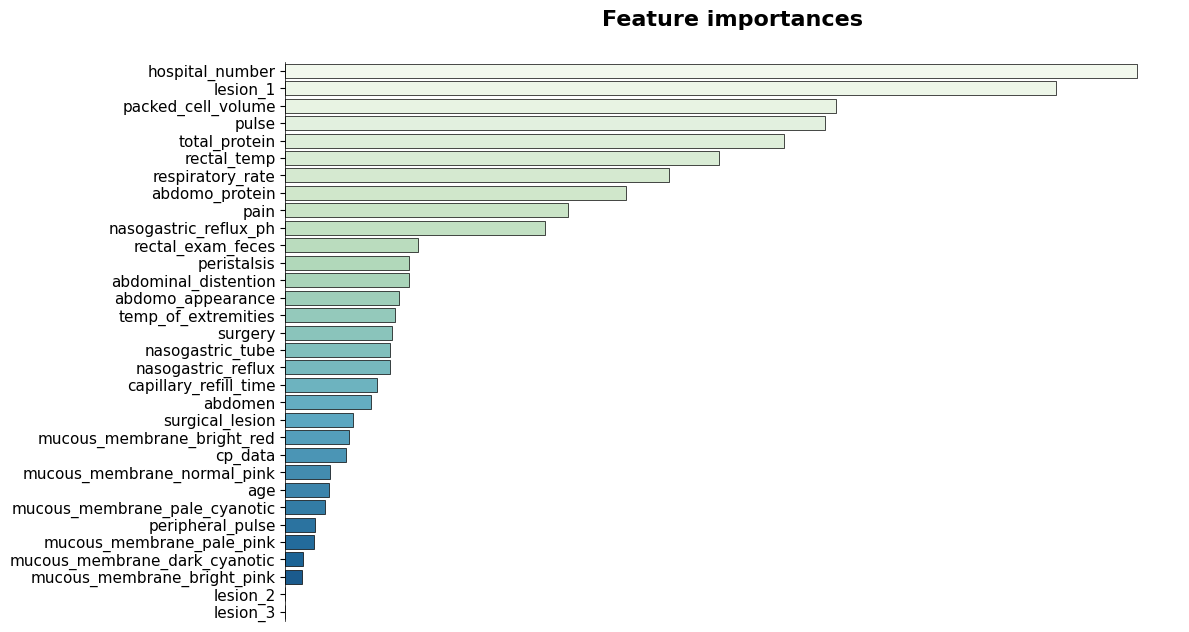

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
def f_importance_plot(f_imp):
    fig = plt.figure(figsize=(12, 0.20*len(f_imp)))
    plt.title(f'Feature importances', size=16, y=1.05, 
              fontweight='bold')
    a = sns.barplot(data=f_imp, x='imp', y='feature', linestyle="-", 
                    linewidth=0.5, edgecolor="black",palette='GnBu')
    plt.xlabel('')
    plt.xticks([])
    plt.ylabel('')
    plt.yticks(size=11)
    
    for j in ['right', 'top', 'bottom']:
        a.spines[j].set_visible(False)
    for j in ['left']:
        a.spines[j].set_linewidth(0.5)
    plt.tight_layout()
    plt.show()
clf = LGBMClassifier(n_estimators=200,
                     max_depth=4,
                     random_state=42)
clf.fit(df_train.drop(target,axis=1), df_train[target])

f_imp_df = pd.DataFrame({'feature': df_train.drop(target,axis=1).columns, 'imp': clf.feature_importances_})
f_imp_df.sort_values(by='imp',ascending=False,inplace=True)
f_importance_plot(f_imp_df)

In [23]:
best_feature_num = 30
best_score = 0.7392406127690802
print(f'Best feature number is Top {best_feature_num}, Best score is {best_score}')

Best feature number is Top 30, Best score is 0.7392406127690802


In [24]:
best_features = f_imp_df.head(best_feature_num).feature.to_list()
best_features

['hospital_number',
 'lesion_1',
 'packed_cell_volume',
 'pulse',
 'total_protein',
 'rectal_temp',
 'respiratory_rate',
 'abdomo_protein',
 'pain',
 'nasogastric_reflux_ph',
 'rectal_exam_feces',
 'peristalsis',
 'abdominal_distention',
 'abdomo_appearance',
 'temp_of_extremities',
 'surgery',
 'nasogastric_tube',
 'nasogastric_reflux',
 'capillary_refill_time',
 'abdomen',
 'surgical_lesion',
 'mucous_membrane_bright_red',
 'cp_data',
 'mucous_membrane_normal_pink',
 'age',
 'mucous_membrane_pale_cyanotic',
 'peripheral_pulse',
 'mucous_membrane_pale_pink',
 'mucous_membrane_dark_cyanotic',
 'mucous_membrane_bright_pink']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_train[best_features]
y = df_train[target]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

test = df_test[best_features]

test_df = scaler.fit_transform(test)

In [27]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score


hist_model = HistGradientBoostingClassifier(
    max_depth=4,          
    max_iter=80,          
    learning_rate=0.1,     
    random_state=42,   
    scoring='f1_micro',          
    max_leaf_nodes = 21,
    l2_regularization = 0.1,
)

hist_model.fit(X_train, y_train)
pred = hist_model.predict(X_valid)
print(f"HistGradientBoosting Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"HistGradientBoosting Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))

HistGradientBoosting Model: F1 Score (Micro-Average) = 73.62%
HistGradientBoosting Model: Accuracy Score = 73.62%
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66        93
         1.0       0.78      0.64      0.70        55
         2.0       0.77      0.82      0.79       159

    accuracy                           0.74       307
   macro avg       0.73      0.70      0.72       307
weighted avg       0.74      0.74      0.73       307



In [28]:
import numpy as np
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Definisikan ruang hyperparameter
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'max_iter': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_leaf_nodes': [15, 21, 31, 41],
    'l2_regularization': [0, 0.1, 0.5, 1.0]
}

# Inisialisasi model HistGradientBoostingClassifier
hist_model = HistGradientBoostingClassifier(
    random_state=42
)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=hist_model,
    param_grid=param_grid,
    scoring='accuracy',  # atau 'f1_micro' untuk F1 Score Micro-Average
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Lakukan pencarian hyperparameter
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik dan evaluasi model
print(f"Best Hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

pred = best_model.predict(X_valid)

print(f"HistGradientBoosting Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"HistGradientBoosting Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))


Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best Hyperparameters: {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'max_iter': 50, 'max_leaf_nodes': 31}
HistGradientBoosting Model: F1 Score (Micro-Average) = 74.92%
HistGradientBoosting Model: Accuracy Score = 74.92%
              precision    recall  f1-score   support

         0.0       0.69      0.70      0.70        93
         1.0       0.72      0.62      0.67        55
         2.0       0.79      0.82      0.81       159

    accuracy                           0.75       307
   macro avg       0.73      0.71      0.72       307
weighted avg       0.75      0.75      0.75       307



In [29]:
#XGBoost
xgb_model = XGBClassifier(
  max_depth=4,           
  n_estimators=80,          
  learning_rate=0.1,     
  random_state=42,
  objective='multi:softmax',
  num_class=3,
  eval_metric='merror',
  use_label_encoder=False
)

xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_valid)

print(f"XGboost Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"XGboost Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))

XGboost Model: F1 Score (Micro-Average) = 73.29%
XGboost Model: Accuracy Score = 73.29%
              precision    recall  f1-score   support

         0.0       0.64      0.65      0.64        93
         1.0       0.79      0.60      0.68        55
         2.0       0.77      0.83      0.80       159

    accuracy                           0.73       307
   macro avg       0.73      0.69      0.71       307
weighted avg       0.73      0.73      0.73       307



In [30]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Definisikan ruang hyperparameter
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 0.01, 0.1]
}

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(
    random_state=42,
    objective='multi:softmax',
    num_class=3,
    eval_metric='merror',
    use_label_encoder=False
)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # atau 'f1_micro' untuk F1 Score Micro-Average
    cv=3,
    verbose=2,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

pred = best_model.predict(X_valid)

print(f"XGboost Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"XGboost Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))

Fitting 3 folds for each of 62208 candidates, totalling 186624 fits


KeyboardInterrupt: 

In [31]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

knn = KNeighborsClassifier(n_neighbors=5)
param_grid = {'n_neighbors': np.arange(1, 31)}


grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

pred = knn_best.predict(X_valid)

print(f"KNN Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"KNN Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))

KNN Model: F1 Score (Micro-Average) = 61.89%
KNN Model: Accuracy Score = 61.89%
              precision    recall  f1-score   support

         0.0       0.54      0.61      0.57        93
         1.0       0.59      0.53      0.56        55
         2.0       0.68      0.65      0.67       159

    accuracy                           0.62       307
   macro avg       0.60      0.60      0.60       307
weighted avg       0.62      0.62      0.62       307



In [32]:
# #SVM
# from sklearn.svm import SVC

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'poly', 'sigmoid']
# }

# svm_model = SVC(random_state=42)
# grid_search = GridSearchCV(svm_model, param_grid, refit=True, cv=3, verbose=2, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_svm_model = grid_search.best_estimator_
# svm_model.fit(X_train, y_train)
# pred = best_svm_model.predict(X_train)

# print(f"SVM Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
# print(f"SVM Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
# print(classification_report(y_valid, pred))

In [33]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

grid_search = GridSearchCV(gnb, param_grid, refit=True, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gnb_model = grid_search.best_estimator_
best_gnb_model.fit(X_train, y_train)

pred = best_gnb_model.predict(X_valid)
print(f"GNB Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"GNB Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
GNB Model: F1 Score (Micro-Average) = 59.28%
GNB Model: Accuracy Score = 59.28%
              precision    recall  f1-score   support

         0.0       0.56      0.22      0.31        93
         1.0       0.80      0.36      0.50        55
         2.0       0.58      0.89      0.70       159

    accuracy                           0.59       307
   macro avg       0.64      0.49      0.50       307
weighted avg       0.61      0.59      0.55       307



In [34]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(rf, param_grid, refit=True, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

pred = best_rf_model.predict(X_valid)

print(f"Random Forest Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"Random Forest Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))


Fitting 3 folds for each of 150 candidates, totalling 450 fits


C:\Users\indra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\indra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Model: F1 Score (Micro-Average) = 74.59%
Random Forest Model: Accuracy Score = 74.59%
              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70        93
         1.0       0.73      0.58      0.65        55
         2.0       0.81      0.80      0.81       159

    accuracy                           0.75       307
   macro avg       0.73      0.71      0.72       307
weighted avg       0.75      0.75      0.75       307



In [36]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_valid)

print(f"KNN Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"KNN Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))

KNN Model: F1 Score (Micro-Average) = 61.56%
KNN Model: Accuracy Score = 61.56%
              precision    recall  f1-score   support

         0.0       0.53      0.65      0.58        93
         1.0       0.61      0.49      0.55        55
         2.0       0.68      0.64      0.66       159

    accuracy                           0.62       307
   macro avg       0.61      0.59      0.60       307
weighted avg       0.62      0.62      0.62       307



In [37]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

pred = gnb.predict(X_valid)
print(f"GNB Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"GNB Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))

GNB Model: F1 Score (Micro-Average) = 59.28%
GNB Model: Accuracy Score = 59.28%
              precision    recall  f1-score   support

         0.0       0.56      0.22      0.31        93
         1.0       0.80      0.36      0.50        55
         2.0       0.58      0.89      0.70       159

    accuracy                           0.59       307
   macro avg       0.64      0.49      0.50       307
weighted avg       0.61      0.59      0.55       307



In [38]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

pred = rf.predict(X_valid)

print(f"Random Forest Model: F1 Score (Micro-Average) = {f1_score(y_valid, pred, average='micro') * 100:.2f}%")
print(f"Random Forest Model: Accuracy Score = {accuracy_score(y_valid, pred) * 100:.2f}%")
print(classification_report(y_valid, pred))


Random Forest Model: F1 Score (Micro-Average) = 75.57%
Random Forest Model: Accuracy Score = 75.57%
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72        93
         1.0       0.72      0.56      0.63        55
         2.0       0.80      0.83      0.81       159

    accuracy                           0.76       307
   macro avg       0.74      0.71      0.72       307
weighted avg       0.75      0.76      0.75       307



In [ ]:
sample_submission = pd.read_csv("../dataset/sample_submission.csv")
submission = hist_model.predict(test_df)
sample_submission['outcome'] = submission
sample_submission

In [ ]:
outcome_mapping = {0.0: 'died', 1.0: 'euthanized', 2.0: 'lived'}

# Map the values in the "outcome" column using the dictionary
sample_submission['outcome'] = sample_submission['outcome'].map(outcome_mapping)
sample_submission

In [ ]:
sample_submission.to_csv('submission_lbgm.csv', index=False)